In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.drop('label', axis = 1)
y = data['label'].copy()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
spliter = StratifiedShuffleSplit(n_splits = 3, test_size = 0.4,
                                random_state = 42)

In [7]:
for train_index, test_index in spliter.split(X, y):
    strat_train_x = X.loc[train_index]
    strat_train_y = y.loc[train_index]
    strat_test_x = X.loc[train_index]
    strat_test_y = y.loc[train_index]

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
forest_clf = RandomForestClassifier(n_estimators = 3,
                                   random_state = 43)
forest_clf.fit(strat_train_x, strat_train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [28]:
forest_clf.score(strat_test_x, strat_test_y)

0.9723412698412699

In [13]:
import joblib

In [38]:
joblib.dump(forest_clf, 'forest_clf.pkl')

['forest_clf.pkl']

[[0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.33333333 0.         0.        ]]
[5]


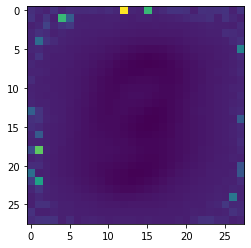

In [15]:
random_data = np.random.rand((784))
random_data = std_scale.transform([random_data])
plt.imshow(random_data.reshape(28, 28))
print(forest_clf.predict_proba(random_data))
print(forest_clf.predict(random_data))

In [21]:
forest_clf.score(scale_test_x, strat_test_y)

0.9723809523809523

[1]


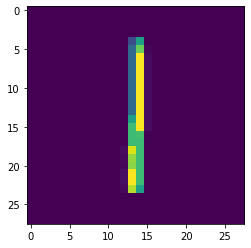

In [35]:
i = 65
tmp = [strat_test_x.values[i]]
print(forest_clf.predict(tmp))
plt.imshow(tmp[0].reshape(28, 28))